In [1]:
import pandas as pd
import seaborn as sns
from glob import glob

## Compression benchmarks
These benchmarks compare the compression to the decompression time of a random file

<AxesSubplot:xlabel='task', ylabel='task_runtime'>

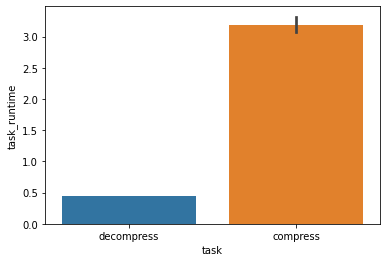

In [2]:
df = pd.read_csv("../results/benchmark-gzip.csv")
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df = pd.concat([df_start, df_end], axis=1)
df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
df = df[["task", "task_runtime"]]
sns.barplot(x="task", y="task_runtime", data=df)

## I/O Benchmark single file from S3
Read write I/O for incrementing a single file from S3 once

(0.0, 20.0)

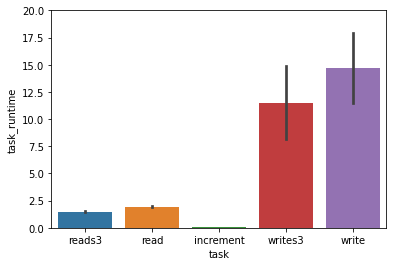

In [3]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_1i_1f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df = pd.concat([df_start, df_end], axis=1)
df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
df = df[["task", "task_runtime"]]

ax = sns.barplot(x="task", y="task_runtime", data=df)
ax.set_ylim([0,20])

## I/O Benchmark 1 files from S3, 5 iterations
Read and write benchmarks for incrementing 1 file from s3 5 times

(0.0, 20.0)

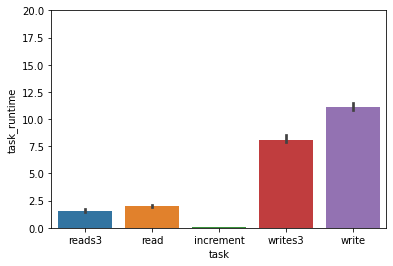

In [4]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_5i_1f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df = pd.concat([df_start, df_end], axis=1)
df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
df = df[["task", "task_runtime"]]

ax = sns.barplot(x="task", y="task_runtime", data=df)
ax.set_ylim([0,20])

## I/O Benchmark 1 files from S3, 10 iterations
Read and write benchmarks for incrementing 1 file from s3 10 times

(0.0, 20.0)

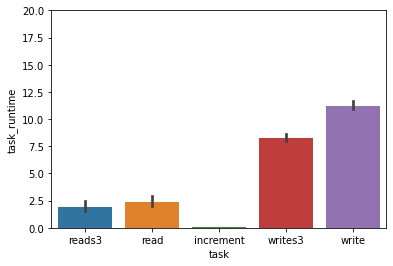

In [5]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_10i_1f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df = pd.concat([df_start, df_end], axis=1)
df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
df = df[["task", "task_runtime"]]

ax = sns.barplot(x="task", y="task_runtime", data=df)
ax.set_ylim([0,20])

##  I/O Benchmark cached vs no cache
1 file, 1 repetition

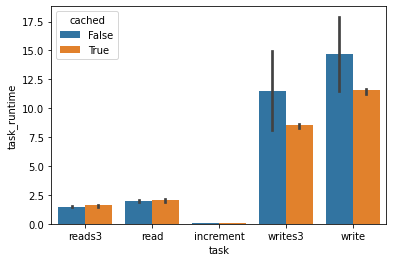

In [6]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_1i_1f_cache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df_cached = pd.concat([df_start, df_end], axis=1)
df_cached["task_runtime"] = (df_cached["end"] - df_cached["start"]) * 10**-9
df_cached = df_cached[["task", "task_runtime"]]
df_cached["cached"] = True

df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_1i_1f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df_ncached = pd.concat([df_start, df_end], axis=1)
df_ncached["task_runtime"] = (df_ncached["end"] - df_ncached["start"]) * 10**-9
df_ncached = df_ncached[["task", "task_runtime"]]
df_ncached["cached"] = False

df = pd.concat([df_cached, df_ncached])

ax = sns.barplot(x="task", y="task_runtime", data=df, hue="cached")


## I/O Benchmark cached vs no-cache 10 repetitions

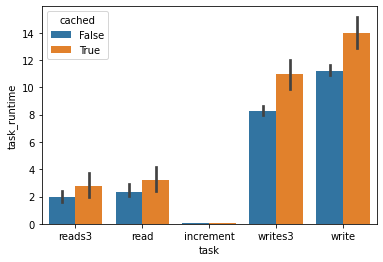

In [7]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_10i_1f_cache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df_cached = pd.concat([df_start, df_end], axis=1)
df_cached["task_runtime"] = (df_cached["end"] - df_cached["start"]) * 10**-9
df_cached = df_cached[["task", "task_runtime"]]
df_cached["cached"] = True

df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_10i_1f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df_ncached = pd.concat([df_start, df_end], axis=1)
df_ncached["task_runtime"] = (df_ncached["end"] - df_ncached["start"]) * 10**-9
df_ncached = df_ncached[["task", "task_runtime"]]
df_ncached["cached"] = False

df = pd.concat([df_cached, df_ncached])

ax = sns.barplot(x="task", y="task_runtime", data=df, hue="cached")


## I/O Benchmark 5 files from S3, 1 iterations
Read and write benchmarks for incrementing 5 file from s3 1 times

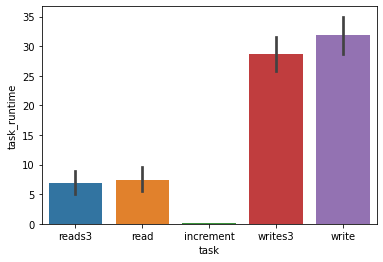

In [8]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_1i_5f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df = pd.concat([df_start, df_end], axis=1)
df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
df = df[["task", "task_runtime"]]

ax = sns.barplot(x="task", y="task_runtime", data=df)

## I/O benchmark 10 files from S3, 10 iterations

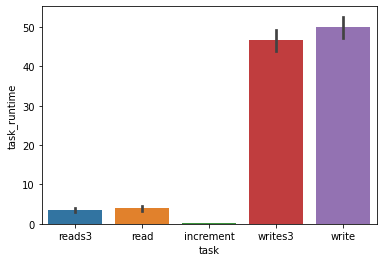

In [9]:
df = pd.concat([pd.read_csv(f) for f in glob("../results/conditions-dask/rep-*/benchmark_10i_10f_nocache*")])
df_start = df[df["action"].str.contains("start")].reset_index()
df_end = df[df["action"].str.contains("end")].reset_index()

df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
df_start["start"] = df_start["timestamp"]
df_end["end"] = df_end["timestamp"]

df = pd.concat([df_start, df_end], axis=1)
df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
df = df[["task", "task_runtime"]]

ax = sns.barplot(x="task", y="task_runtime", data=df)
